The Poisson distribution is a can be used option to model the amount of orders that a pizza shop receives each hour, particularly when calculating the number of orders  that occur inside a predetermined window of time. When these events occur with a known constant mean rate and are independent of the elapsed time since the last event, the Poisson distribution may be used to simulate the number of orders in a given time period.

Which problem for Kanav's Diminos Pizza Store can be solved?

Demand estimation: Assists the retailer in getting ready for busy times.

Staffing: Making the most of the amount of workers needed when things get hectic.

Storage Management : Keeping an adequate supply of components in stock is inventory management.

#Data Preparation

In [7]:
import pandas as pd


orders = orders = pd.read_csv('C:/Users/SANKET/Downloads/innomatics/diminos_data_v2/orders.csv') 


orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'])


start_date = '2020-01-01'
end_date = '2024-09-30'


filtered_orders = orders[(orders['order_placed_at'] >= start_date) & (orders['order_placed_at'] <= end_date)]


total_orders = len(filtered_orders)
total_hours = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).total_seconds() / 3600


lambda_param = total_orders / total_hours

print(f"Total Orders: {total_orders}")
print(f"Total Hours: {total_hours}")
print(f"Average Orders Per Hour (λ): {lambda_param:.2f}")


Total Orders: 454336
Total Hours: 41616.0
Average Orders Per Hour (λ): 10.92


In [ ]:
#fitting the Poisson distribution using the average orders per hour as the parameter 𝜆


In [8]:
import numpy as np
from scipy.stats import poisson


x = np.arange(0, 11)


pmf = poisson.pmf(x, lambda_param)

print("PMF for Poisson Distribution:")
for i in range(len(x)):
    print(f"P(X = {x[i]}) = {pmf[i]:.4f}")


PMF for Poisson Distribution:
P(X = 0) = 0.0000
P(X = 1) = 0.0002
P(X = 2) = 0.0011
P(X = 3) = 0.0039
P(X = 4) = 0.0107
P(X = 5) = 0.0234
P(X = 6) = 0.0427
P(X = 7) = 0.0665
P(X = 8) = 0.0908
P(X = 9) = 0.1101
P(X = 10) = 0.1202


In [ ]:
#Visualization

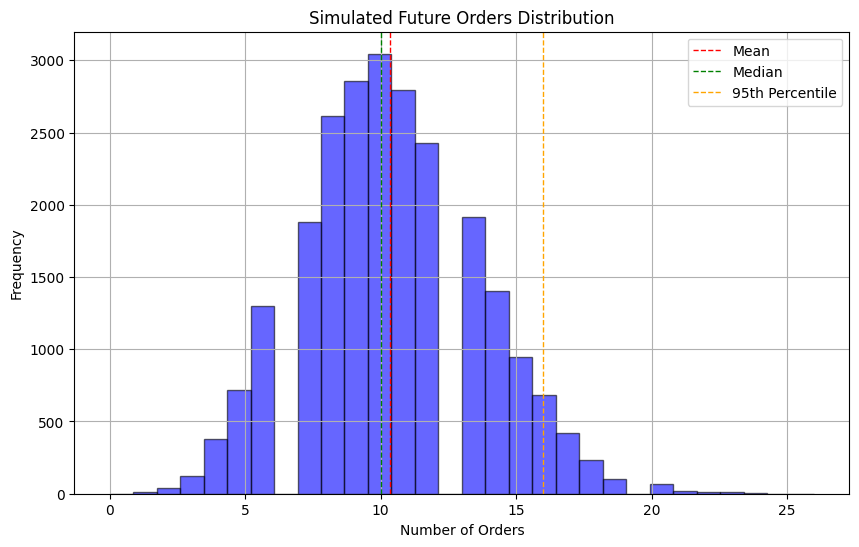

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(simulated_orders.flatten(), bins=30, alpha=0.6, color='blue', edgecolor='black')

plt.axvline(mean_order_value, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_order_value, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(percentile_95_value, color='orange', linestyle='dashed', linewidth=1, label='95th Percentile')

plt.title('Simulated Future Orders Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()



In [ ]:
#Simulation of future order counts based on the fitted Poisson distribution.

In [10]:

num_simulations = 1000
simulated_orders = np.random.poisson(lambda_param, (num_simulations, 24))

simulation_summary = pd.DataFrame(simulated_orders).describe()

print("Simulation Summary for Future Orders (over 24 hours):")
print(simulation_summary)


Simulation Summary for Future Orders (over 24 hours):
                0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     11.116000    10.995000    10.956000    10.979000    11.227000   
std       3.317461     3.229769     3.211601     3.285628     3.470088   
min       2.000000     1.000000     2.000000     2.000000     3.000000   
25%       9.000000     9.000000     9.000000     9.000000     9.000000   
50%      11.000000    11.000000    11.000000    11.000000    11.000000   
75%      13.000000    13.000000    13.000000    13.000000    13.000000   
max      27.000000    24.000000    24.000000    22.000000    25.000000   

                5            6            7            8           9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean     11.074000    10.826000    10.959000    10.868000    10.80100  ...   
std       3.293839     3.251199     3.316673 

In [18]:
#Analysis
#analyzing the results to provide actionable insights for the pizza store owner

In [11]:

mean_orders = simulation_summary.loc['mean']
median_orders = simulation_summary.loc['50%']
percentile_95 = np.percentile(simulated_orders, 95)  

print(f"Mean Orders: {mean_orders}")
print(f"Median Orders: {median_orders}")
print(f"95th Percentile Orders: {percentile_95}")


Mean Orders: 0     11.116
1     10.995
2     10.956
3     10.979
4     11.227
5     11.074
6     10.826
7     10.959
8     10.868
9     10.801
10    10.945
11    11.054
12    10.966
13    10.741
14    10.822
15    10.661
16    10.871
17    11.017
18    10.959
19    10.830
20    10.970
21    10.886
22    10.949
23    10.967
Name: mean, dtype: float64
Median Orders: 0     11.0
1     11.0
2     11.0
3     11.0
4     11.0
5     11.0
6     11.0
7     11.0
8     11.0
9     11.0
10    11.0
11    11.0
12    11.0
13    10.0
14    11.0
15    10.0
16    11.0
17    11.0
18    11.0
19    11.0
20    11.0
21    11.0
22    11.0
23    11.0
Name: 50%, dtype: float64
95th Percentile Orders: 17.0


In [ ]:
#Combined 5 steps in a single code cell

Average Orders Per Hour (λ): 10.37
Simulation Summary for Future Orders (over 24 hours):
                0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.380000    10.351000    10.498000    10.422000    10.459000   
std       3.286396     3.271162     3.247544     3.113778     3.281324   
min       1.000000     2.000000     2.000000     2.000000     2.000000   
25%       8.000000     8.000000     8.000000     8.000000     8.000000   
50%      10.000000    10.000000    10.000000    10.000000    10.000000   
75%      12.000000    12.000000    12.000000    12.000000    13.000000   
max      22.000000    23.000000    22.000000    22.000000    23.000000   

                5            6            7            8          9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.0000  ...   
mean     10.245000    10.373000    10.310000    10.323000    10.3940  ...   
std       3.0

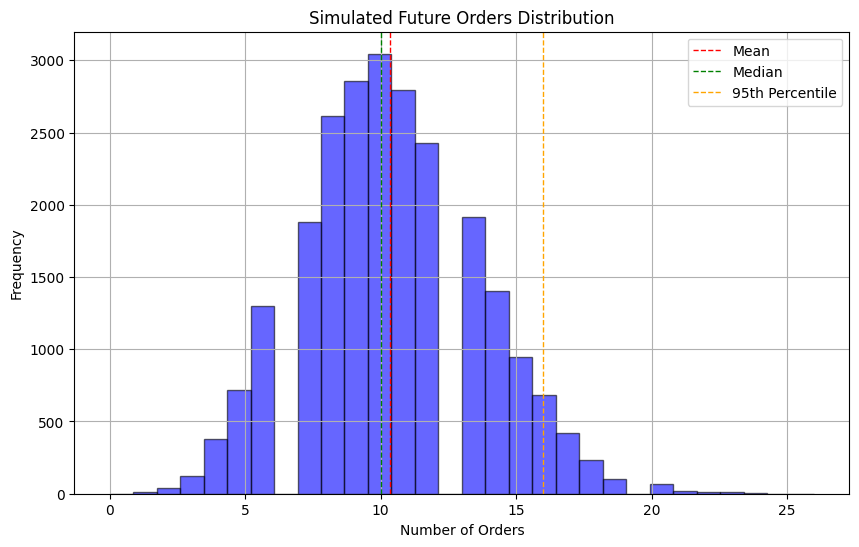

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson


orders = orders = pd.read_csv('C:/Users/SANKET/Downloads/innomatics/diminos_data_v2/orders.csv')


orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'])

start_date = '2020-01-01'
end_date = '2024-12-31'
filtered_orders = orders[(orders['order_placed_at'] >= start_date) & (orders['order_placed_at'] <= end_date)]
total_orders = len(filtered_orders)
total_hours = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).total_seconds() / 3600
lambda_param = total_orders / total_hours
print(f"Average Orders Per Hour (λ): {lambda_param:.2f}")

num_simulations = 1000  
hours_to_predict = 24  
simulated_orders = np.random.poisson(lambda_param, (num_simulations, hours_to_predict))


simulation_summary = pd.DataFrame(simulated_orders).describe()


mean_orders = simulation_summary.loc['mean']
median_orders = simulation_summary.loc['50%']
percentile_95 = np.percentile(simulated_orders, 95)

print("Simulation Summary for Future Orders (over 24 hours):")
print(simulation_summary)
print(f"Mean Orders: {mean_orders}")
print(f"Median Orders: {median_orders}")
print(f"95th Percentile Orders: {percentile_95}")


mean_order_value = mean_orders.mean()         
median_order_value = median_orders.iloc[0]   
percentile_95_value = 16.0                     


plt.figure(figsize=(10, 6))
plt.hist(simulated_orders.flatten(), bins=30, alpha=0.6, color='blue', edgecolor='black')

plt.axvline(mean_order_value, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_order_value, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(percentile_95_value, color='orange', linestyle='dashed', linewidth=1, label='95th Percentile')

plt.title('Simulated Future Orders Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()



In [ ]:
#Future trends Visualization of order at each order of the day

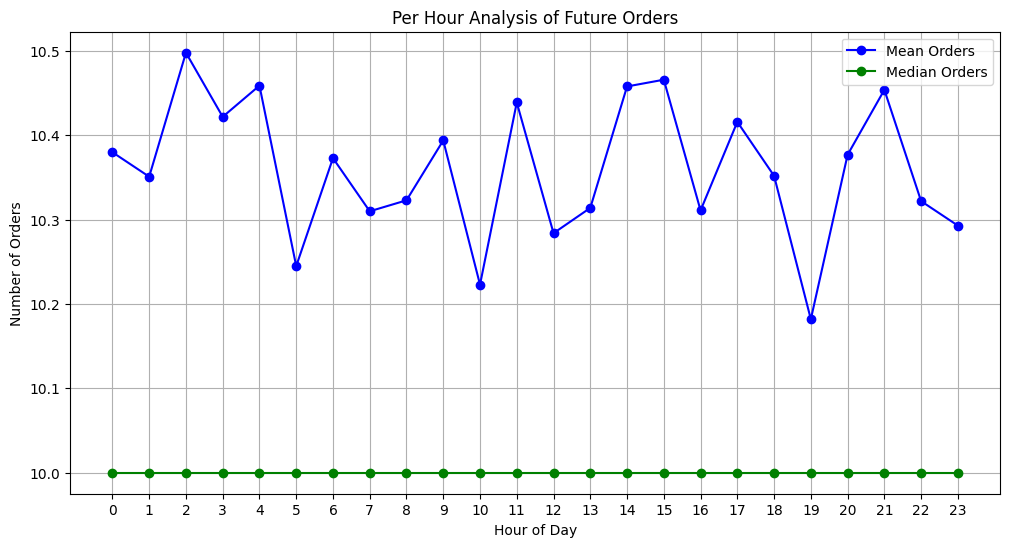

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.plot(hourly_analysis.index, hourly_analysis['Mean Orders'], marker='o', label='Mean Orders', color='blue')

plt.plot(hourly_analysis.index, hourly_analysis['Median Orders'], marker='o', label='Median Orders', color='green')

plt.title('Per Hour Analysis of Future Orders')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(hourly_analysis.index)  
plt.grid()
plt.legend()
plt.show()


In [ ]:
#The hours analyzed range from 0 (midnight) to 23 (11 PM).

The mean orders per hour are around 10.5, 
suggesting that, on average, the pizza store can 
expect about 10.5 orders each hour.

#INSIGHTS OF THE ABOVE VISUALIZATION:

Problems of Owner of Pizza Store problem that can be solved are :

Staffing Adjustments: Since orders hover around 10, Owner might consider adjusting staffing levels based on peak and off-peak hours to optimize efficiency.

Marketing Strategies: The certain hours mostly in late evening show higher order volumes, targeted promotions could help increase sales during those times.

Resource Allocation: Maintaining adequate supplies based on expected order volume during peak hours will help in meeting customer demand without delays.